<a href="https://colab.research.google.com/github/Priyo-prog/Deep-Learning-with-Tensorflow/blob/main/Computer%20Vision%20and%20Convolutional%20Neural%20Network%20in%20Tensorflow/CNN_PRACTICE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Practice 1**

## Import The Libraries

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import zipfile
import os

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import random
from pathlib import Path

## Get The Data

In [ ]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2024-09-02 22:47:40--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.98.207, 74.125.197.207, 74.125.135.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.98.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M  92.9MB/s    in 1.1s    

2024-09-02 22:47:41 (92.9 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



In [ ]:
!ls pizza_steak

test  train


In [ ]:
for dirpath, dirname, filenames in os.walk("pizza_steak"):
  print(f"There {len(dirname)} directories and {len(filenames)} images in {dirpath}")

There 2 directories and 0 images in pizza_steak
There 2 directories and 0 images in pizza_steak/test
There 0 directories and 250 images in pizza_steak/test/pizza
There 0 directories and 250 images in pizza_steak/test/steak
There 2 directories and 0 images in pizza_steak/train
There 0 directories and 750 images in pizza_steak/train/pizza
There 0 directories and 750 images in pizza_steak/train/steak


## Get The Class Names

In [ ]:
current_directory = Path().absolute()
data_directory = current_directory/"pizza_steak/train"

In [ ]:
class_names = np.array(sorted([item.name for item in data_directory.glob("*")]))
print(class_names)

['pizza' 'steak']


## Visualize The Random Image

In [ ]:
def view_random_image(target_dir, target_class):
  target_folder = target_dir + target_class

  random_image = random.sample(os.listdir(target_folder), 1)
  print(random_image)

  # mpimg.imread() doesn't read PosixPath
  img = mpimg.imread(target_folder + "/" + random_image[0])

  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")
  print(f"Image Shape {img.shape}")
  return img

['1423515.jpg']
Image Shape (512, 512, 3)


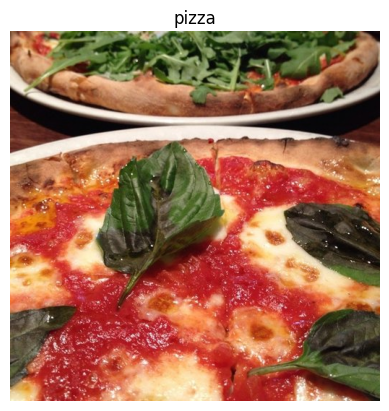

In [ ]:
# View Random Image
img = view_random_image(target_dir="pizza_steak/train/", target_class="pizza")

## Get The Train and Test Data

In [ ]:
train_dir = "/content/pizza_steak/train"
test_dir = "/content/pizza_steak/test"

## Augmented Data

In [ ]:
# Create ImageDataGenerator training instance with data augmentation
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=0.2,
                                             shear_range=0.2,
                                             zoom_range=0.2,
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             horizontal_flip=True)

# Create ImageDataGenerator instance without data augmentation
train_datagen = ImageDataGenerator(rescale=1/255.)

# Create ImageDataGenerator instance without data augmentation for test data
test_datagen = ImageDataGenerator(rescale=1/255.)

In [ ]:
# Import data from directory and augment it
print("Augmented Training Data : ")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224,224),
                                                                   batch_size=32,
                                                                   class_mode="binary",
                                                                   shuffle=False)

print("Non-Augmented Training Data : ")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224,224),
                                               batch_size=32,
                                               class_mode="binary",
                                               shuffle=False)

print("Augmented Test Data : ")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224,224),
                                             batch_size=32,
                                             class_mode="binary",
                                             shuffle=True)

Augmented Training Data : 
Found 1500 images belonging to 2 classes.
Non-Augmented Training Data : 
Found 1500 images belonging to 2 classes.
Augmented Test Data : 
Found 500 images belonging to 2 classes.


## Visualize The Augemted Data

In [ ]:
images, labels = next(train_data)
augmented_images, augmented_label = next(train_data_augmented)

Show Image No. 28


(-0.5, 223.5, 223.5, -0.5)

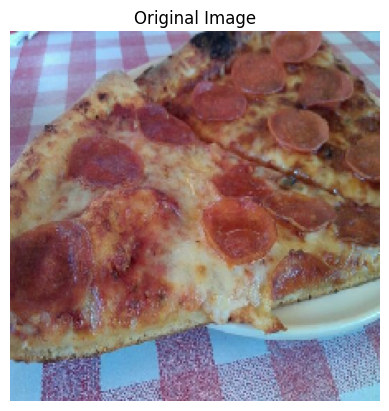

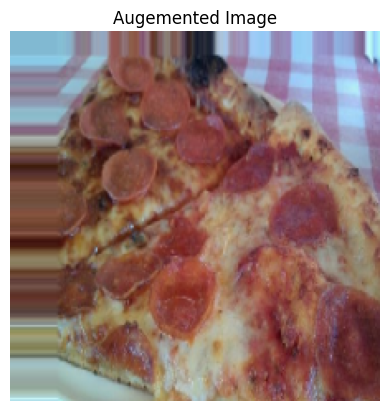

In [ ]:
random_number = random.randint(0,31)
print(f"Show Image No. {random_number}")

plt.imshow(images[random_number])
plt.title("Original Image")
plt.axis(False)
plt.figure()

plt.imshow(augmented_images[random_number])
plt.title("Augemented Image")
plt.axis(False)

## Create The CNN Model

In [ ]:
# 1. Create The Model
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation=tf.keras.activations.relu,
                           input_shape=(224,224,3)),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding="valid"),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=1, activation=tf.keras.activations.sigmoid)
])

# 2. Compile The Model
model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# 3. Create Learning Rate Scheduler
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/10))

steps_per_epoch = train_data_augmented.samples
validation_steps = train_data.samples

# 4. Fit The Model
find_lr_history = model.fit(train_data_augmented,
                            epochs=6,
                            steps_per_epoch=steps_per_epoch,
                            validation_data=test_data,
                            validation_steps= validation_steps,
                            callbacks=[lr_scheduler])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/6


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


  46/1500 ━━━━━━━━━━━━━━━━━━━━ 10:52 449ms/step - accuracy: 0.6208 - loss: 0.8770

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


1500/1500 ━━━━━━━━━━━━━━━━━━━━ 37s 16ms/step - accuracy: 0.5877 - loss: 0.8016 - val_accuracy: 0.5000 - val_loss: 0.6788 - learning_rate: 0.0010
Epoch 2/6
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 19s 11ms/step - accuracy: 0.6117 - loss: 0.6570 - val_accuracy: 0.7140 - val_loss: 0.5697 - learning_rate: 0.0013
Epoch 3/6
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.6629 - loss: 0.6314 - val_accuracy: 0.6860 - val_loss: 0.5537 - learning_rate: 0.0016
Epoch 4/6
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 19s 11ms/step - accuracy: 0.6527 - loss: 0.6459 - val_accuracy: 0.7660 - val_loss: 0.5181 - learning_rate: 0.0020
Epoch 5/6
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 22s 12ms/step - accuracy: 0.6920 - loss: 0.6913 - val_accuracy: 0.6060 - val_loss: 0.7171 - learning_rate: 0.0025
Epoch 6/6
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 39s 11ms/step - accuracy: 0.6576 - loss: 0.6586 - val_accuracy: 0.7500 - val_loss: 0.5244 - learning_rate: 0.0032


## Evaluate The Data

<Axes: >

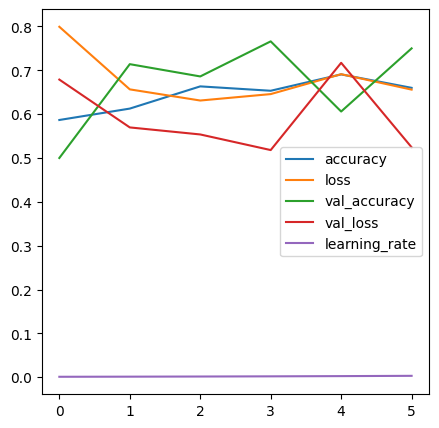

In [ ]:
pd.DataFrame(find_lr_history.history).plot(figsize=(5,5))

## Plot Learning Rate  Decay Curve

Text(0.5, 1.0, 'Find The Ideal Learning Rate')

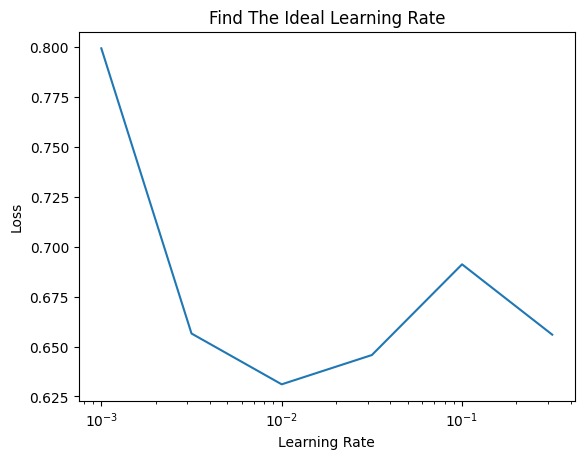

In [ ]:
lrs = 1e-3 * (10**(tf.range(6)/2))
plt.semilogx(lrs, find_lr_history.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Find The Ideal Learning Rate")

## Refit The Model With The Ideal Learning Rate

In [ ]:
# 1. Create the model
model = tf.keras.Sequential([
   tf.keras.layers.Conv2D(filters=10,
                          kernel_size=3,
                          activation=tf.keras.activations.relu,
                          input_shape=(224,224,3)),
   tf.keras.layers.MaxPool2D(pool_size=2, padding="valid"),
   tf.keras.layers.Conv2D(10,3, activation="relu"),
   tf.keras.layers.MaxPool2D(pool_size=2, padding="valid"),
   tf.keras.layers.Flatten(),
   tf.keras.layers.Dense(units=1, activation=tf.keras.activations.sigmoid)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics=["accuracy"])

steps_per_epoch = train_data_augmented.samples
validation_steps = test_data.samples


# 3. Fit the model
history = model.fit(train_data_augmented,
                    epochs=6,
                    steps_per_epoch=steps_per_epoch,
                    validation_data=test_data,
                    validation_steps=validation_steps)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/6
  46/1500 ━━━━━━━━━━━━━━━━━━━━ 8:06 335ms/step - accuracy: 0.4587 - loss: 0.7511

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


1500/1500 ━━━━━━━━━━━━━━━━━━━━ 23s 12ms/step - accuracy: 0.4664 - loss: 0.7273 - val_accuracy: 0.5020 - val_loss: 0.6931
Epoch 2/6
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 39s 11ms/step - accuracy: 0.4991 - loss: 0.6995 - val_accuracy: 0.5420 - val_loss: 0.6897
Epoch 3/6
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 19s 11ms/step - accuracy: 0.4775 - loss: 0.7039 - val_accuracy: 0.4980 - val_loss: 0.6945
Epoch 4/6
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 22s 11ms/step - accuracy: 0.4980 - loss: 0.6939 - val_accuracy: 0.5280 - val_loss: 0.6911
Epoch 5/6
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 21s 12ms/step - accuracy: 0.5533 - loss: 0.6890 - val_accuracy: 0.5220 - val_loss: 0.7209
Epoch 6/6
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 19s 11ms/step - accuracy: 0.5911 - loss: 0.7037 - val_accuracy: 0.5200 - val_loss: 0.6849


## Create Function For Loss Curve

In [ ]:
def plot_loss_curve(history):
  """
   plot loss curve for training and validation metrics
  """
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"]))

  plt.figure(figsize=(5,5))
  plt.plot(epochs, loss, label="training loss")
  plt.plot(epochs, val_loss, label="val_loss")
  plt.xlabel("epochs")
  plt.title("loss")
  plt.legend()

  plt.figure(figsize=(5,5))
  plt.plot(epochs, accuracy, label="training accuracy")
  plt.plot(epochs, val_accuracy, label="val accuracy")
  plt.xlabel("epochs")
  plt.title("accuracy")
  plt.legend()

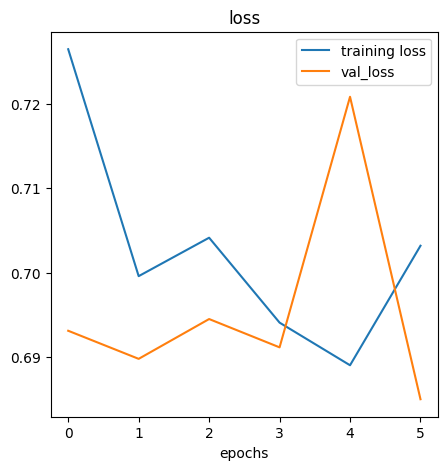

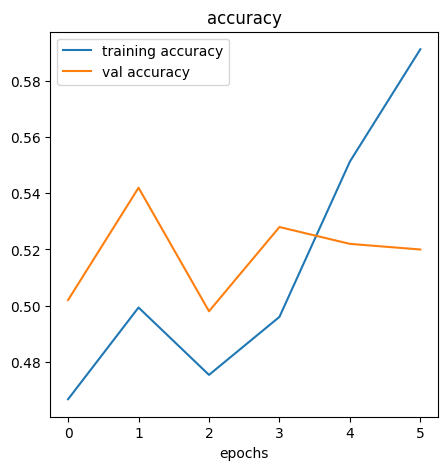

In [ ]:
plot_loss_curve(history)

## Function To Resize Custom Image

In [ ]:
def load_prep_image(filename, image_shape=224):
  """
   Reads a iage from filename and turns it into tensor
   and reshape it to (image_shape, image_shape, color_channel)
  """
  # Read the filename
  img = tf.io.read_file(filename)
  # Decode the file image to tensor
  img = tf.image.decode_image(img)
  # resize the image
  img = tf.image.resize(img, size=[image_shape, image_shape])
  # Rescale the image (values between 0s and 1s)
  img = img/255.
  return img

## Get The Custom Image And Preprocess It

In [ ]:
!wget https://wallpapercave.com/wp/wc1813154.jpg

--2024-09-02 22:52:54--  https://wallpapercave.com/wp/wc1813154.jpg
Resolving wallpapercave.com (wallpapercave.com)... 104.22.52.71, 104.22.53.71, 172.67.29.26, ...
Connecting to wallpapercave.com (wallpapercave.com)|104.22.52.71|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 506413 (495K) [image/jpeg]
Saving to: ‘wc1813154.jpg’

wc1813154.jpg       100%[===================>] 494.54K   882KB/s    in 0.6s    

2024-09-02 22:52:55 (882 KB/s) - ‘wc1813154.jpg’ saved [506413/506413]



(-0.5, 2559.5, 1599.5, -0.5)

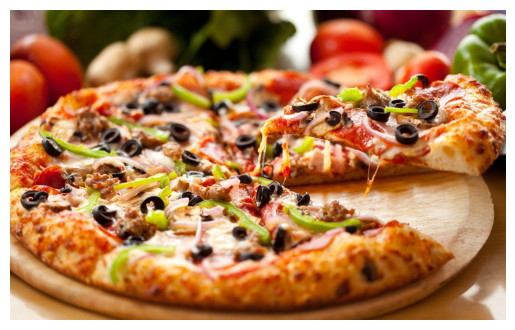

In [ ]:
pizza = mpimg.imread("/content/wc1813154.jpg")
plt.imshow(pizza)
plt.axis(False)

In [ ]:
pizza_tensor = load_prep_image("/content/wc1813154.jpg")
pizza_tensor

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.5812325 , 0.47142857, 0.4557423 ],
        [0.52755105, 0.41858745, 0.40262103],
        [0.497479  , 0.36498597, 0.35686275],
        ...,
        [0.42326927, 0.38011205, 0.5369748 ],
        [0.4009404 , 0.40662292, 0.59103626],
        [0.3687249 , 0.4044811 , 0.60710025]],

       [[0.552381  , 0.44257703, 0.42689076],
        [0.5221489 , 0.4297519 , 0.40732294],
        [0.48285317, 0.36912766, 0.3534414 ],
        ...,
        [0.44503757, 0.34964028, 0.48767507],
        [0.45520157, 0.3546217 , 0.5386751 ],
        [0.44247684, 0.36328626, 0.5787919 ]],

       [[0.58457386, 0.4747699 , 0.45908362],
        [0.5587035 , 0.44889954, 0.43321326],
        [0.49607843, 0.38627452, 0.37058824],
        ...,
        [0.5726295 , 0.49373662, 0.52138895],
        [0.536354  , 0.3864944 , 0.5204482 ],
        [0.49377686, 0.3433758 , 0.5436375 ]],

       ...,

       [[0.94509804, 0.91764706, 0.85490197],
        [0.94

## Prediction Of Reshaped Image

In [ ]:
pred = model.predict(tf.expand_dims(pizza_tensor, axis=0))
pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 888ms/step


array([[0.56729347]], dtype=float32)

In [ ]:
# Remid ourselves of the clas names
class_names

array(['pizza', 'steak'], dtype='<U5')

In [ ]:
def pred_and_plot(model, filename, class_names=class_names):
  """
   Load the Image from filename, predict theimage with a model
   and plot the image with the class name as the title
  """

  # Import the target image and preprocess it
  img = load_prep_image(filename)

  # Make the prdediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  pred_class = class_names[int(tf.round(pred))]

  # plot the image and the predicted class
  plt.imshow(img)
  plt.title(f"Preediction: {pred_class}")
  plt.axis(False)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


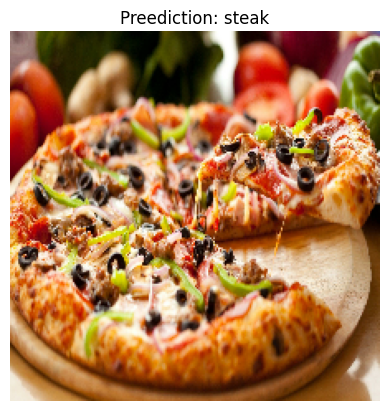

In [ ]:
pred_and_plot(model, filename="/content/wc1813154.jpg")

## Create Model Using Functional API

In [ ]:
inputs = tf.keras.layers.Input(shape=(224,224,3))
x = tf.keras.layers.Conv2D(filters=10, kernel_size=3, activation=tf.keras.activations.relu)(inputs)
x = tf.keras.layers.MaxPool2D(pool_size=2, padding="valid")(x)
x = tf.keras.layers.Conv2D(10, 3, activation="relu")(x)
x = tf.keras.layers.MaxPool2D(pool_size=2, padding="valid")(x)
x = tf.keras.layers.Flatten()(x)
outputs = tf.keras.layers.Dense(units=1, activation=tf.keras.activations.sigmoid)(x)
functional_model = tf.keras.Model(inputs, outputs, name="functional_model")

functional_model.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                         optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
                         metrics = ["accuracy"])

steps_per_epoch = train_data_augmented.samples // train_data_augmented.batch_size
validation_steps = test_data.samples // test_data.batch_size

history = functional_model.fit(train_data_augmented,
                               epochs=6,
                               steps_per_epoch=steps_per_epoch,
                               validation_data=test_data,
                               validation_steps=validation_steps)

Epoch 1/6
46/46 ━━━━━━━━━━━━━━━━━━━━ 21s 370ms/step - accuracy: 0.5057 - loss: 4.1929 - val_accuracy: 0.5000 - val_loss: 0.6927
Epoch 2/6
 1/46 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 1.0000 - loss: 0.6743

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 1.0000 - loss: 0.6743 - val_accuracy: 0.5000 - val_loss: 0.6954
Epoch 3/6
46/46 ━━━━━━━━━━━━━━━━━━━━ 38s 362ms/step - accuracy: 0.6427 - loss: 0.6879 - val_accuracy: 0.5021 - val_loss: 0.6929
Epoch 4/6
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0000e+00 - loss: 0.7244 - val_accuracy: 0.4500 - val_loss: 0.6939
Epoch 5/6
46/46 ━━━━━━━━━━━━━━━━━━━━ 19s 353ms/step - accuracy: 0.5000 - loss: 0.6934 - val_accuracy: 0.4958 - val_loss: 0.6922
Epoch 6/6
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 620us/step - accuracy: 1.0000 - loss: 0.6816 - val_accuracy: 0.6000 - val_loss: 0.6913


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 444ms/step


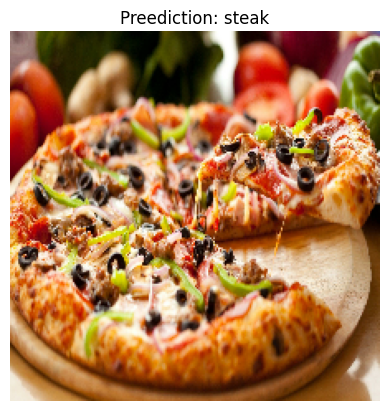

In [ ]:
pred_and_plot(model=functional_model, filename="/content/wc1813154.jpg")

## Practice 2

## Import Libraries

In [44]:
import zipfile
import os
from pathlib import Path

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import random

In [45]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# Unzip the downloaded data
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2024-09-04 01:23:59--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.175.207, 74.125.24.207, 142.251.10.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.175.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip.2’

pizza_steak.zip.2   100%[===================>] 104.47M  21.9MB/s    in 6.1s    

2024-09-04 01:24:06 (17.0 MB/s) - ‘pizza_steak.zip.2’ saved [109540975/109540975]



## Inspect The Data

In [46]:
!ls pizza_steak

test  train


In [47]:
!ls pizza_steak/train

pizza  steak


In [48]:
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}")

There are 2 directories and 0 images in pizza_steak
There are 2 directories and 0 images in pizza_steak/train
There are 0 directories and 750 images in pizza_steak/train/steak
There are 0 directories and 750 images in pizza_steak/train/pizza
There are 2 directories and 0 images in pizza_steak/test
There are 0 directories and 250 images in pizza_steak/test/steak
There are 0 directories and 250 images in pizza_steak/test/pizza


## Get The Class Names

In [49]:
current_directory = Path().absolute()
data_directory = current_directory/"pizza_steak/train"

In [50]:
# Create the list of class names from the subdirectories
class_names = np.array(sorted([item.name for item in data_directory.glob("*")]))
print(class_names)

['pizza' 'steak']


## Visualize The Image

In [51]:
def view_random_image(target_dir, target_class):
  target_folder = target_dir + target_class

  random_image = random.sample(os.listdir(target_folder), 1)
  print(random_image)

  # mpimg.imread() does not read PosixPath
  img = mpimg.imread(f"{target_folder}/{random_image[0]}")
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")

  print(f"Image Shape {img.shape}")

  return img

['3386119.jpg']
Image Shape (512, 512, 3)


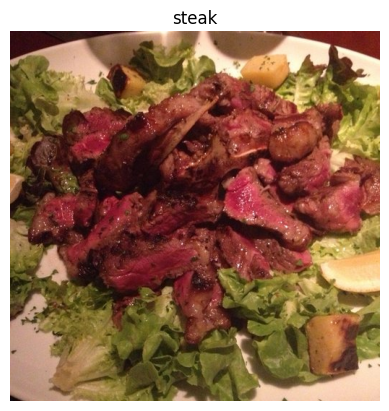

In [52]:
# View random image
img = view_random_image(target_dir="pizza_steak/train/",
                        target_class="steak")

## Get The Train And Test Directory

In [53]:
train_dir = "/content/pizza_steak/train"
test_dir = "pizza_steak/test"

## Augmented Data

Data augmentation is a process of altering our training data, leading to have more diversity and in turn allowing our models to learn more generalizable patterns. Altering might mean adjusting the rotation of an image, flipping it, cropping it or something similar. All these can be done without collecting more data

In [54]:
# Create ImageDataGenerator training instance with augmentation
train_datagen_augmented = ImageDataGenerator(rescale=1/255.0,
                                             rotation_range=0.2,
                                             shear_range=0.2,
                                             zoom_range=0.2,
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             horizontal_flip=True)

# Create ImageDataGenerator instance without augmentation
train_datagen = ImageDataGenerator(rescale=1/255.0)

# Create ImageDataGenerator instance without augmentation for test data
test_datagen = ImageDataGenerator(rescale=1/255.0)

In [55]:
# Import data and augment it for training
print("Augmented Training Data")

train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                      target_size=(224,224),
                                                                      batch_size=32,
                                                                      class_mode="binary",
                                                                      shuffle=False)

# Create non-augmented train data batches
print("Non-augmented Training Data")
train_data = train_datagen.flow_from_directory(train_dir,
                           target_size=(224,224),
                           batch_size=32,
                           class_mode="binary",
                           shuffle=False)


# Create non-augmented test data batches
print("Non-augmented Test Data")
test_data = test_datagen.flow_from_directory(test_dir,
                         target_size=(224,224),
                         batch_size=32,
                         class_mode="binary")

Augmented Training Data
Found 1500 images belonging to 2 classes.
Non-augmented Training Data
Found 1500 images belonging to 2 classes.
Non-augmented Test Data
Found 500 images belonging to 2 classes.


In [56]:
images, labels = next(train_data)
augmented_images, augmented_labels = next(train_data_augmented)

Show Image Number 30


(-0.5, 223.5, 223.5, -0.5)

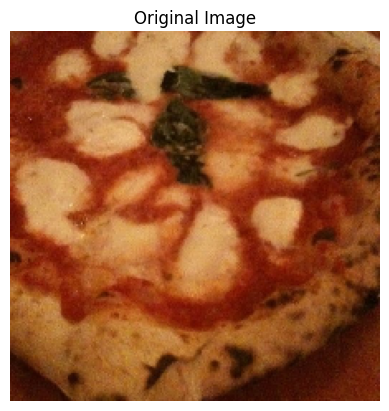

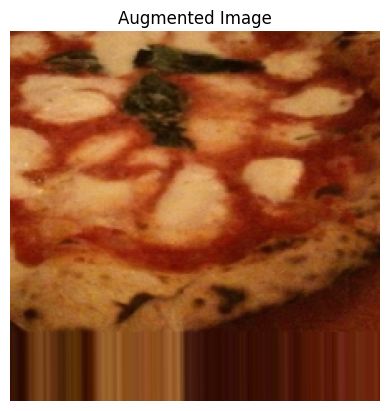

In [57]:
random_number = random.randint(0,31)
print(f"Show Image Number {random_number}")

plt.imshow(images[random_number])
plt.title("Original Image")
plt.axis(False)
plt.figure()

plt.imshow(augmented_images[random_number])
plt.title("Augmented Image")
plt.axis(False)

## Build A CNN Sequential Model

In [58]:
# Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation=tf.keras.activations.relu,
                           input_shape=(224,224,3)),
    tf.keras.layers.MaxPool2D(pool_size=2, padding="valid"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2, padding="valid"),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=1, activation=tf.keras.activations.sigmoid)
])

# Compile a model
model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])


lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/10))

steps_per_epochs = train_data_augmented.samples // train_data_augmented.batch_size
validation_steps = test_data.samples // test_data.batch_size

find_lr_history = model.fit(train_data_augmented,
                            epochs=6,
                            steps_per_epoch=steps_per_epochs,
                            validation_data=test_data,
                            validation_steps=validation_steps,
                            callbacks=[lr_scheduler])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/6


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


46/46 ━━━━━━━━━━━━━━━━━━━━ 23s 413ms/step - accuracy: 0.4455 - loss: 0.9590 - val_accuracy: 0.5167 - val_loss: 0.7145 - learning_rate: 0.0010
Epoch 2/6
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2188 - loss: 0.8849 - val_accuracy: 0.8000 - val_loss: 0.5825 - learning_rate: 0.0013
Epoch 3/6


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


46/46 ━━━━━━━━━━━━━━━━━━━━ 19s 368ms/step - accuracy: 0.5257 - loss: 0.6944 - val_accuracy: 0.6125 - val_loss: 0.6894 - learning_rate: 0.0016
Epoch 4/6
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 777us/step - accuracy: 0.5625 - loss: 0.6941 - val_accuracy: 0.7000 - val_loss: 0.6849 - learning_rate: 0.0020
Epoch 5/6
46/46 ━━━━━━━━━━━━━━━━━━━━ 21s 383ms/step - accuracy: 0.5488 - loss: 0.7964 - val_accuracy: 0.4938 - val_loss: 0.7288 - learning_rate: 0.0025
Epoch 6/6
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 912us/step - accuracy: 0.0000e+00 - loss: 1.2029 - val_accuracy: 0.6500 - val_loss: 0.6076 - learning_rate: 0.0032


## Evaluate Our Model

<Axes: >

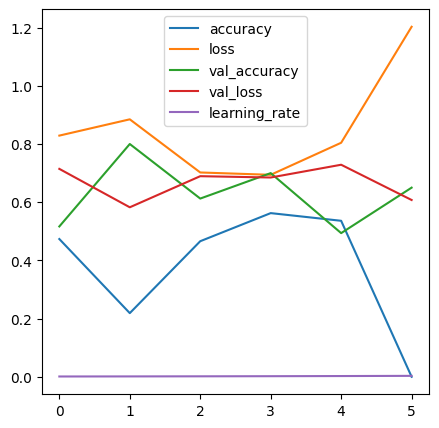

In [59]:
pd.DataFrame(find_lr_history.history).plot(figsize=(5,5))

## Plot Learning Rate Decay Curve

---



Text(0.5, 1.0, 'Find The Ideal learning rate')

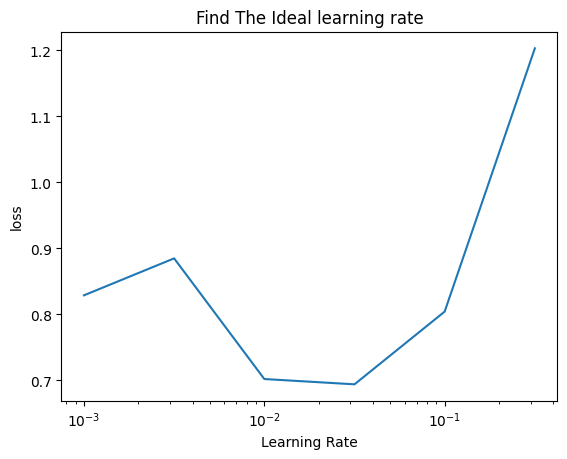

In [60]:
lrs = 1e-3 * (10**(tf.range(6)/2))
plt.semilogx(lrs, find_lr_history.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("loss")
plt.title("Find The Ideal learning rate")

## Refit The Model With The Ideal Training Rate

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation=tf.keras.activations.relu, input_shape=(224,224,3)),
    tf.keras.layers.MaxPool2D(pool_size=3, padding="valid"),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=3, padding="valid"),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=1, activation=tf.keras.activations.sigmoid)
])

model.compile(loss=tf.keras.losses.BinaryFocalCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
              metrics=["accuracy"])

steps_per_epochs = train_data_augmented.samples // train_data_augmented.batch_size
validation_steps = test_data.samples // test_data.batch_size

history=model.fit(train_data_augmented,
          epochs=6,
          steps_per_epoch=steps_per_epochs,
          validation_data=test_data,
          validation_steps=validation_steps)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/6
46/46 ━━━━━━━━━━━━━━━━━━━━ 28s 407ms/step - accuracy: 0.4902 - loss: 310.7152 - val_accuracy: 0.4979 - val_loss: 0.1906
Epoch 2/6
 1/46 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.0000e+00 - loss: 0.2786

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0000e+00 - loss: 0.2786 - val_accuracy: 0.5500 - val_loss: 0.1822
Epoch 3/6
46/46 ━━━━━━━━━━━━━━━━━━━━ 38s 430ms/step - accuracy: 0.4282 - loss: 0.1912 - val_accuracy: 0.4958 - val_loss: 0.1755
Epoch 4/6
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 792us/step - accuracy: 0.0000e+00 - loss: 0.2045 - val_accuracy: 0.6000 - val_loss: 0.1691
Epoch 5/6
19/46 ━━━━━━━━━━━━━━━━━━━━ 9s 366ms/step - accuracy: 0.4000 - loss: 0.1842 

## Function For Loss Curve

In [43]:
def plot_loss_curve(history):
  """
   Return different loss curves for training and validation metrics
  """
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"]))

  # Plot Loss
  plt.figure(figsize=(5,5))
  plt.plot(epochs, loss, label="training_loss")
  plt.plot(epoch, val_loss, label="val_loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()

  # Plot Accuracy
  plt.figure(figsize=(5,5))
  plt.plot(epochs, accuracy, label="training_accuracy")
  plt.plot(epochs, val_accuracy, label="val_accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend()